## **Basic descriptive statistics**. Part 1: Examining global chromatin signal in different cell types ##
___

### 1. Importing packages and clean data

Before computing any statistical values, the needed packages are imported to the notebook.

In [81]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

Next, the refined ATAC-seq data is loaded.

In [72]:
refined_ATAC = pd.read_csv("refined_ATAC.csv")

### 2. Understanding the structure of the dataset

<p align="justify">
With the data already imported, the next step was to take a look in the .csv file and how it is organized. On top of that, the minimal and maximal values were determined as a guideline for further steps. 
</p>

In [73]:
# Here I am just taking a look at the general structure of the dataset and the first couple of entries.
refined_ATAC.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,Sample ID,Signal
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,preT.DN1.Th,0.11
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,preT.DN1.Th,0.77
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,preT.DN1.Th,0.40
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,preT.DN1.Th,0.46
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,preT.DN1.Th,0.77


In [74]:
# Now I am looking into the number of diferent cell types we have.
cell_types = refined_ATAC["Sample ID"].unique()
print(len(cell_types))

# I am also checking the amount of samples/peaks to ensure that all peaks are here.
len(refined_ATAC)/len(refined_ATAC["ImmGenATAC1219.peakID"].unique())

29


29.0

In [75]:
# Here is a look at the extreme values. 
print(min(refined_ATAC["Signal"]))
print(max(refined_ATAC["Signal"]))

0.1
727.42


Here it should be noted that the signal values vary between 0.1 and 724.42. This information could be used later, when the chromatin accessibility is assessed - both globally and locally.

___

### 3. Basic statistics

In [ ]:
#Cool, we have all cell types in the tidy dataframe. Now onto the signal for each sample. At first, I will just compute the mean values. 
for sample in cell_types:
    sample_refined_ATAC = refined_ATAC[refined_ATAC["Sample ID"] == sample]
    mean_sample = sample_refined_ATAC["Signal"].mean()
    print(f"{sample}: {mean_sample}")
 

preT.DN1.Th: 4.0062492806211525
preT.DN2a.Th: 4.009777426623358
preT.DN2b.Th: 4.001368312215298
preT.DN3.Th: 3.9991435343692374
T.DN4.Th: 4.000097425843014
T.ISP.Th: 3.990197153698339
T.DP.Th: 4.0027249973175705
T.4.Th: 3.9846228308898843
T.8.Th: 3.988537734468734
T.4.Nve.Sp: 3.996411533471844
T.4.Nve.Fem.Sp: 3.934404373823389
T.4.Sp.aCD3+CD40.18hr: 4.0047152235195425
T.8.Nve.Sp: 4.000575854231898
Treg.4.25hi.Sp: 3.9830498736819524
Treg.4.FP3+.Nrplo.Co: 3.9006178952194217
T8.TN.P14.Sp: 3.9825652220563996
T8.TE.LCMV.d7.Sp: 3.9761348237887604
T8.MP.LCMV.d7.Sp: 3.962223490279851
T8.IEL.LCMV.d7.SI: 3.992189662404042
T8.Tcm.LCMV.d180.Sp: 3.9363556804104585
T8.Tem.LCMV.d180.Sp: 3.984893668490719
NKT.Sp: 3.9782816453535443
NKT.Sp.LPS.3hr: 3.9892111706122764
NKT.Sp.LPS.18hr: 3.9551578146489916
NKT.Sp.LPS.3d: 3.990897882343761
LTHSC.34-.BM: 3.8684376944761456
LTHSC.34+.BM: 4.00576747724812
STHSC.150-.BM: 4.001125040236443
MPP4.135+.BM: 4.0023235692895955


In [86]:
# Here I create a dataframe with all the basic statistical values. SD = standard deviation, CV = coefficient of variation
stats = []
for sample in cell_types:
    sample_refined_ATAC = refined_ATAC[refined_ATAC["Sample ID"] == sample]
    stats.append({
        "Sample ID": sample,
        "Mean": sample_refined_ATAC["Signal"].mean(),
        "Median": sample_refined_ATAC["Signal"].median(),
        "SD": sample_refined_ATAC["Signal"].std(),
        "CV": sample_refined_ATAC["Signal"].std() / sample_refined_ATAC["Signal"].mean()
        })
basic_stats_df = pd.DataFrame(stats)

In [ ]:
basic_stats_df

,Sample ID,Mean,Median,SD,CV
0,preT.DN1.Th,4.006249,1.34,9.896460,2.470256
1,preT.DN2a.Th,4.009777,1.20,9.849384,2.456342
2,preT.DN2b.Th,4.001368,1.34,9.831580,2.457055
3,preT.DN3.Th,3.999144,1.40,9.830203,2.458077
4,T.DN4.Th,4.000097,1.47,9.819900,2.454915
5,T.ISP.Th,3.990197,1.54,9.660167,2.420975
6,T.DP.Th,4.002725,1.51,9.797414,2.447686
7,T.4.Th,3.984623,1.45,9.828451,2.466595
8,T.8.Th,3.988538,1.48,9.886826,2.478810
9,T.4.Nve.Sp,3.996412,1.37,9.819407,2.457056


Globally speaking, there is not much of a difference between the cell types. The values are almost identical, which leads us to a possible conclusion that minimal changes in chromatin accessibility (i.e. individual enhancers) may be what differentiates the cell types. 

Text(0.5, 1.0, 'Per-Sample Mean in ATAC-seq Signal')

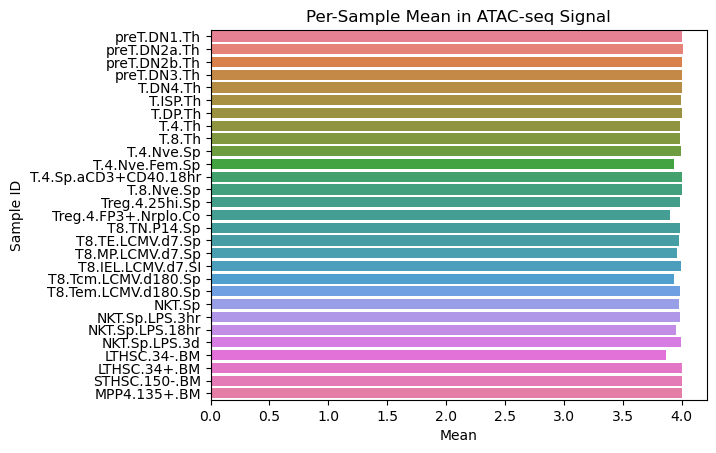

In [88]:
sns.barplot(data=basic_stats_df, x="Mean", y="Sample ID", hue="Sample ID")
plt.title("Per-Sample Mean in ATAC-seq Signal")

**Fig. 1: Mean values of ATAC-seq peak signal in progenitor, abT and T-act cells.** The values of the mean signal in all cell types lie around 4.0. Little difference between the cell types can be observed.

Text(0.5, 1.0, 'Per-Sample Median in ATAC-seq Signal')

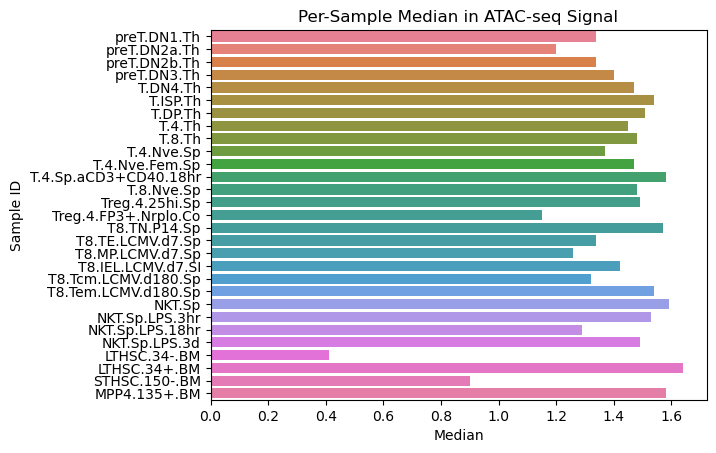

In [89]:
sns.barplot(data=basic_stats_df, x="Median", y="Sample ID", hue="Sample ID", dodge=False)
plt.title("Per-Sample Median in ATAC-seq Signal")


**Fig. 2: Median values of ATAC-seq peak signal in progenitor, abT, and T.act cells.** The median values for all cell types are fairly low and lie between 0.4 and a little over 1.6.

Text(0.5, 1.0, 'Per-Sample CV of ATAC-seq signal')

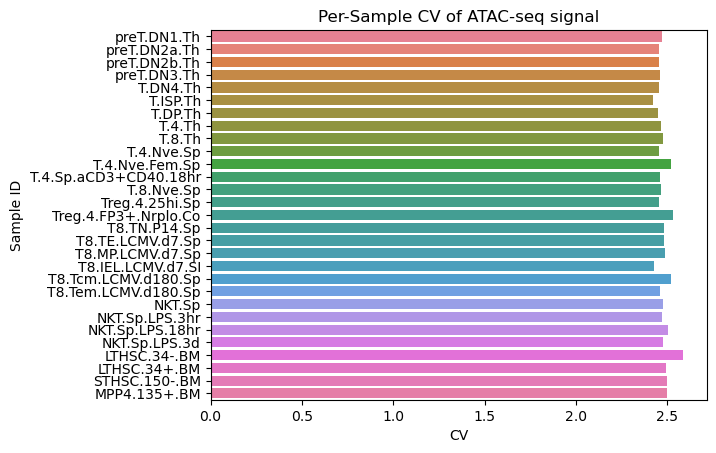

In [90]:
sns.barplot(data=basic_stats_df, x="CV", y="Sample ID", hue="Sample ID")
plt.title("Per-Sample CV of ATAC-seq signal")

**Fig. 3: Coefficient of variance (CV) values of ATAC-seq peak signals in progenitor, abT, and T.act cells.** The CVs of all cell types are quite similar with a value of around 2.5.

<p align="justify">
Plotting the mean (Fig. 1) confirms that the signal values across peaks are generally low and fairly similar to each other. This result is plausible, as there are more than 500.000 peaks being examined across 20 chromosomes, and tells us that differences that occur between cell types should be examined locally. 
</p>
<p align="justify">
The median (Fig. 2) shows values between 0.4 and around 1.6. This indicates that most of the values are quite small, however unlike the mean here some kind of variance can be observed. Whether the difference here is significant on a global should be examined further.
</p>

<p align="justify">
When it comes to the coefficient of variance or CV (Fig. 3), the bar plot is really similar to the mean. There are not any major differences between the cell types with the value being around 2.5 in all cases. 
</p>

___

### 4. Conclusion

<p align="justify">
To summarize, after loading and inspecting the refined ATAC-seq data basic statistical methods were employed. The mean and the CV did not show any noticeable differences between cell types. However, the median was more variable and could potentially be relevant when it comes to overall chromatin accessibility. Nevertheless, all values were fairly low when compared to the maximal signal atained (727.42). 
</p>

<p align="justify">
These results suggest that the global structure of chromatin does not differ significantly across cell types. Instead, it is quite possible that local changes in the accessibility of individual elements (e.g. enhancers) play an important role in the differentiation. Those claims are to be examined further in the following weeks together with the data on gene expression provided by RNA-seq.
</p>